In [81]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os 

In [82]:
DATA_DIR = "../Data"

In [83]:
movies = pd.read_csv(os.path.join(DATA_DIR,"movies.csv"),sep="\t",engine="python",encoding="latin-1")
users = pd.read_csv(os.path.join(DATA_DIR,"users.csv"),sep="\t",engine="python",encoding="latin-1")
ratings = pd.read_csv(os.path.join(DATA_DIR,"ratings.csv"),sep="\t",engine="python",encoding="latin-1")


In [84]:
print(movies.info())
movies.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
dtype: int64


(array([ 356., 1483.,  539., 1603.,  714.,  835.,  276.,  270.,  220.,
         112.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

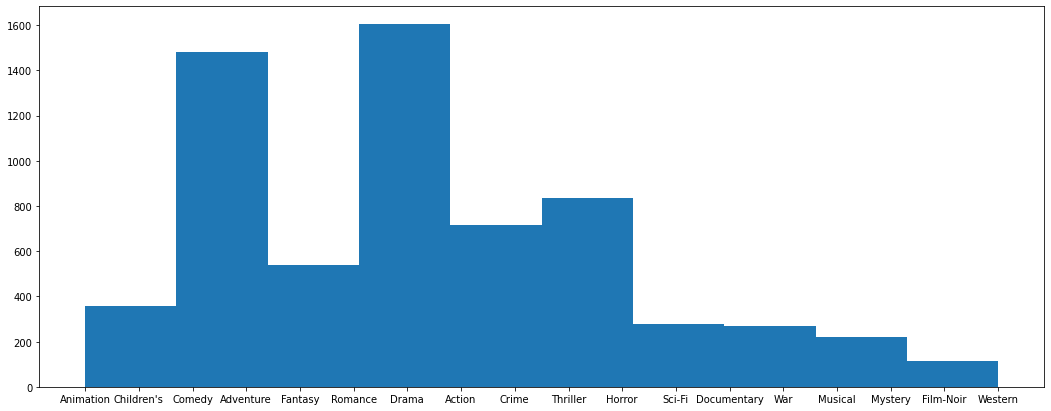

In [85]:
movies["genres_list"] = movies["genres"].apply(lambda value:value.split("|"))
genres = np.concatenate(movies["genres_list"].values)
genres_count = pd.Series(genres).value_counts()
print(genres_count)

plt.figure(figsize=(18,7))
plt.hist(genres)

In [86]:
print(users.info())
users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   object
 3   occupation  6040 non-null   object
 4   zipcode     6040 non-null   object
dtypes: int64(1), object(4)
memory usage: 236.1+ KB
None


,user_id,gender,age,occupation,zipcode
0,1,F,Under 18,K-12 student,48067
1,2,M,56+,self-employed,70072
2,3,M,25-34,scientist,55117
3,4,M,45-49,executive/managerial,02460
4,5,M,25-34,writer,55455
5,6,F,50-55,homemaker,55117
6,7,M,35-44,academic/educator,06810
7,8,M,25-34,programmer,11413
8,9,M,25-34,technician/engineer,61614
9,10,F,35-44,academic/educator,95370


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB
None


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


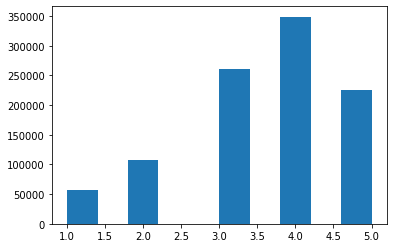

In [87]:
print(ratings.info())
plt.hist(ratings["rating"])
ratings.head(10)

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import linear_kernel

movies["genres"] = movies["genres"].str.split("|")
movies["genres"] = movies["genres"].fillna("").astype("str")
tf = TfidfVectorizer(analyzer="word",ngram_range=(1,2),min_df=0,stop_words="english")
tfidf_matrix = tf.fit_transform(movies["genres"])
tfidf_matrix=tfidf_matrix.toarray()


cosine_sim = tfidf_matrix@tfidf_matrix.T
print(tfidf_matrix.shape)


(3883, 127)


In [107]:
indices={value:index for index,value in enumerate(movies["title"].values)}

In [102]:
def recommand_movie(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores,key=lambda x:x[1],reverse=True)
    sim_scores = sim_scores[0:30]
    recomand_indices = [i[0] for i in sim_scores]
    data = {"title":movies["title"].iloc[recomand_indices].values,"genres":movies["genres_list"].iloc[recomand_indices].values}
    df = pd.DataFrame(data)
    df["simulatrity"] = [i[1] for i in sim_scores]
    return df


In [103]:
recommand_movie("Sabrina (1995)").head(10)

,title,genres,simulatrity
0,Grumpier Old Men (1995),"[Comedy, Romance]",1.0
1,Sabrina (1995),"[Comedy, Romance]",1.0
2,Clueless (1995),"[Comedy, Romance]",1.0
3,Two if by Sea (1996),"[Comedy, Romance]",1.0
4,French Twist (Gazon maudit) (1995),"[Comedy, Romance]",1.0
5,Vampire in Brooklyn (1995),"[Comedy, Romance]",1.0
6,If Lucy Fell (1996),"[Comedy, Romance]",1.0
7,Boomerang (1992),"[Comedy, Romance]",1.0
8,Pie in the Sky (1995),"[Comedy, Romance]",1.0
9,French Kiss (1995),"[Comedy, Romance]",1.0


In [104]:
recommand_movie("Toy Story (1995)").head(10)

,title,genres,simulatrity
0,Toy Story (1995),"[Animation, Children's, Comedy]",1.0
1,Aladdin and the King of Thieves (1996),"[Animation, Children's, Comedy]",1.0
2,"American Tail, An (1986)","[Animation, Children's, Comedy]",1.0
3,"American Tail: Fievel Goes West, An (1991)","[Animation, Children's, Comedy]",1.0
4,"Rugrats Movie, The (1998)","[Animation, Children's, Comedy]",1.0
5,"Bug's Life, A (1998)","[Animation, Children's, Comedy]",1.0
6,Toy Story 2 (1999),"[Animation, Children's, Comedy]",1.0
7,Saludos Amigos (1943),"[Animation, Children's, Comedy]",1.0
8,Chicken Run (2000),"[Animation, Children's, Comedy]",1.0
9,"Adventures of Rocky and Bullwinkle, The (2000)","[Animation, Children's, Comedy]",1.0
